LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime



DATASET

In [2]:
df=pd.read_csv('Data/FB.csv') # read the data
print(df.head(15)) 

    No.                        Time Protocol  Length        DT  source port  \
0     1  2021-12-12 19:24:52.486874     SSDP     167  0.000000      44472.0   
1     2  2021-12-12 19:24:52.486874     SSDP     167  0.000000      44472.0   
2     3  2021-12-12 19:24:52.486874     SSDP     167  0.000000      44472.0   
3     4  2021-12-12 19:24:53.670789      ARP      42  1.183915          NaN   
4     5  2021-12-12 19:24:53.670823      ARP      42  0.000034          NaN   
5     6  2021-12-12 19:24:53.966224  TLSv1.2     243  0.295401      49084.0   
6     7  2021-12-12 19:24:54.113588      TCP      66  0.147364        443.0   
7     8  2021-12-12 19:24:54.215187  TLSv1.2     281  0.101599        443.0   
8     9  2021-12-12 19:24:54.317778      TCP      66  0.102591      49084.0   
9    10  2021-12-12 19:24:55.538761     MDNS     103  1.220983       5353.0   
10   11  2021-12-12 19:24:57.315090  TLSv1.2     317  1.776329      49084.0   
11   12  2021-12-12 19:24:57.467081      TCP      66

CLEANING

In [3]:
df.drop('No.',axis=1,inplace=True) # drop the column 'No.'
df.drop('Frequency',axis=1,inplace=True) # drop the column 'Frequency'
df.drop('New Column',axis=1,inplace=True) # drop the column 'New Column'


In [4]:
print(df.isnull().sum()) # check for missing values

Time                  0
Protocol              0
Length                0
DT                    0
source port         368
Absolute Time         0
Cumulative Bytes      0
dtype: int64


In [5]:
df=df[~df['source port'].isnull()].copy() # drop the rows with missing values

In [6]:
print(df.isnull().sum()) # Re-check for missing values

Time                0
Protocol            0
Length              0
DT                  0
source port         0
Absolute Time       0
Cumulative Bytes    0
dtype: int64


In [7]:
label_encoder = preprocessing.LabelEncoder() # create a label encoder object

df['Protocol']=label_encoder.fit_transform(df['Protocol']) # encode the protocol column, for later use
print(df.head()['Protocol']) # check the encoded values

0     7
1     7
2     7
5    12
6    10
Name: Protocol, dtype: int32


In [19]:
dfshort=df.head(1000) # create a dataframe with only the first 20000 rows

RELATIONS

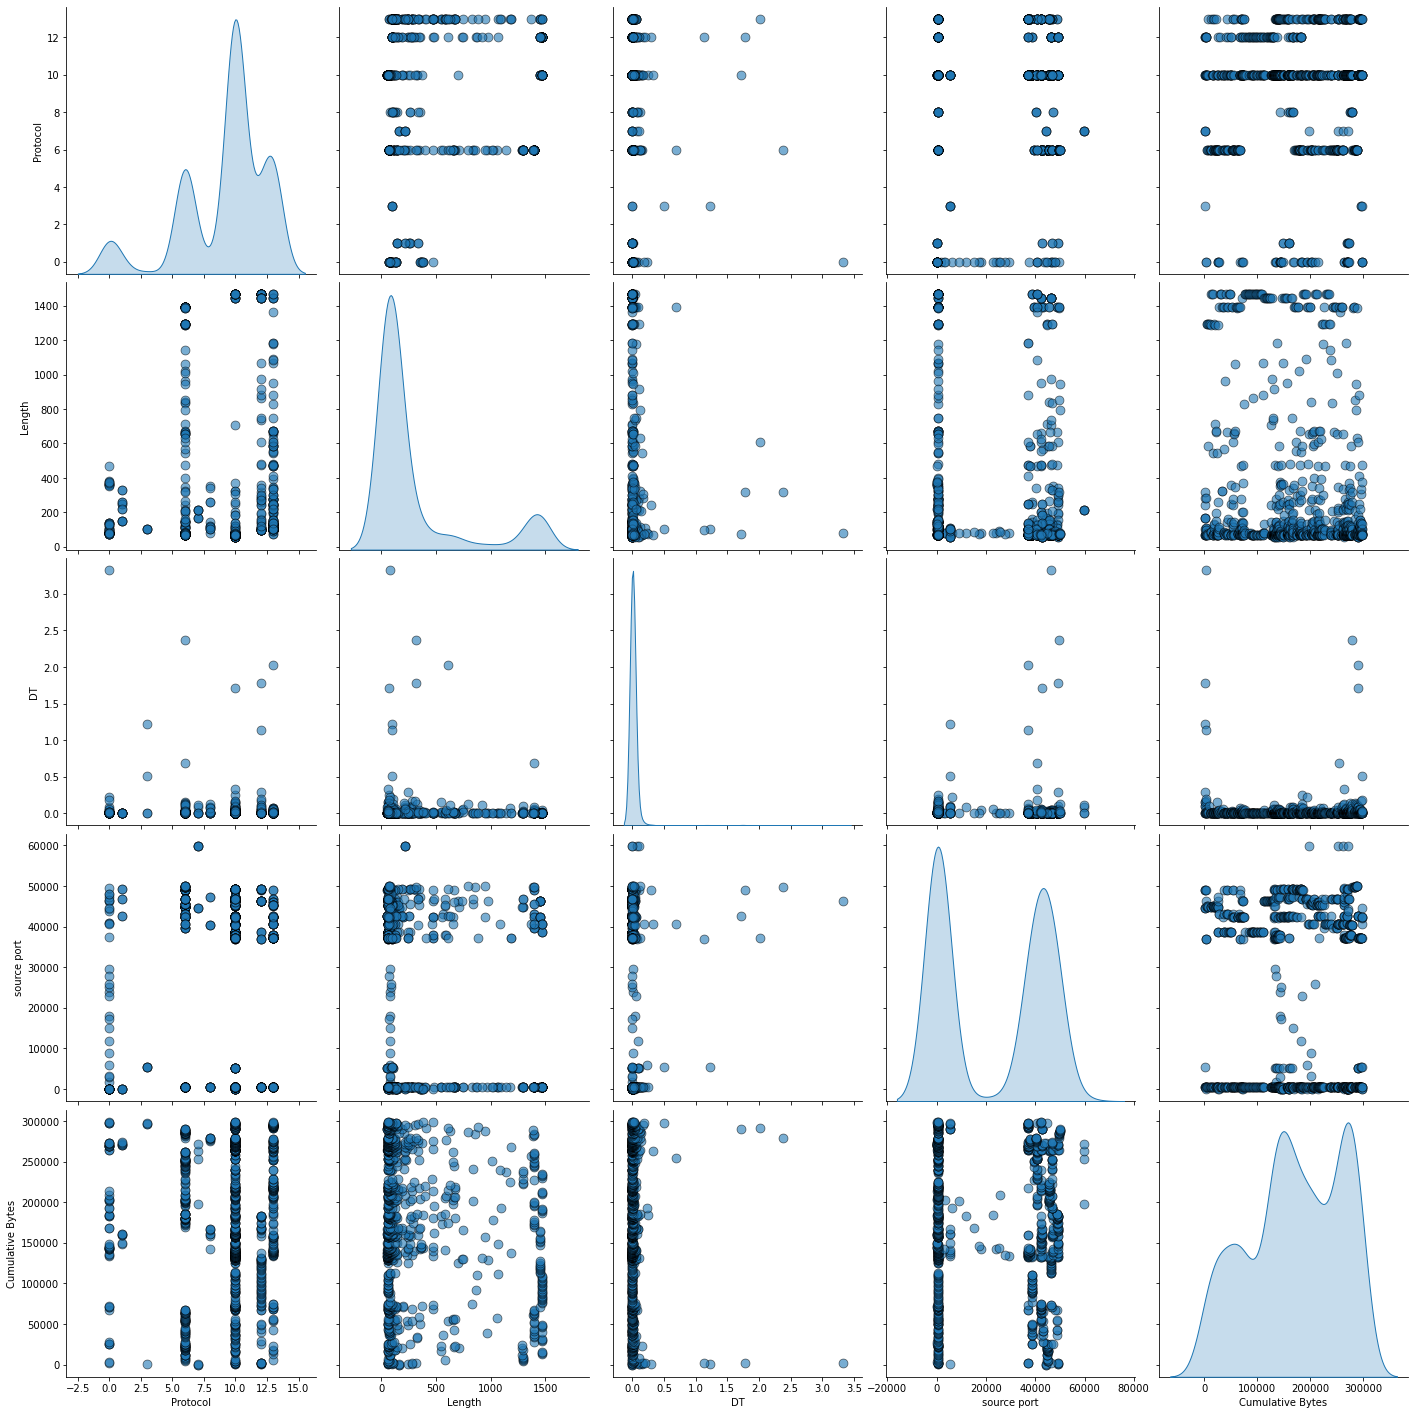

In [22]:
sns.pairplot(dfshort, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4) # create a pairplot

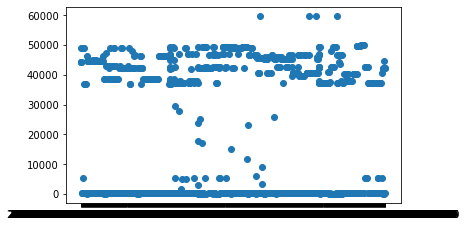

In [23]:
x=dfshort['Time']
y=dfshort['source port']
plt.gcf().autofmt_xdate() # format the dates on the x-axis
plt.scatter(x,y) # plot the data
plt.show()
plt.close()

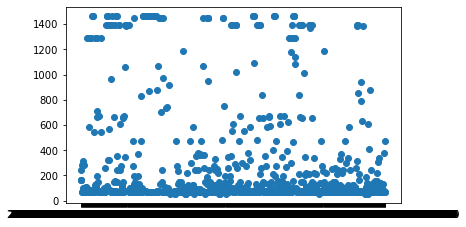

In [24]:
x=dfshort['Time']
y=dfshort['Length']
plt.gcf().autofmt_xdate() # format the dates on the x-axis 
plt.scatter(x,y)
plt.show()
plt.close()

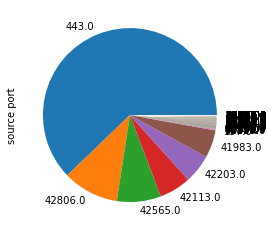

In [28]:
df['source port'].value_counts().plot(kind='pie') # plot the source port distribution
plt.show()

MANIPULATION

<AxesSubplot:ylabel='source port'>

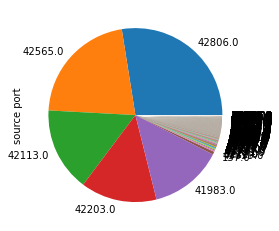

In [30]:
dftemp=df[df['source port']!=443] # drop the rows with source port 443 - target variable
dftemp['source port'].value_counts().plot(kind='pie') # plot the source port distribution

In [36]:
print(dftemp[dftemp['source port']==42806]) # check the number of rwo with source port
# 42806, so that we can make similar amount of data for the target variable of 443 rows

                              Time  Protocol  Length        DT  source port  \
388192  2021-12-12 20:11:18.979130        10      74  0.219761      42806.0   
388205  2021-12-12 20:11:19.265126        10      66  0.001645      42806.0   
388209  2021-12-12 20:11:19.277079        13     493  0.008512      42806.0   
388216  2021-12-12 20:11:19.282931        10      66  0.000284      42806.0   
388221  2021-12-12 20:11:19.415807        13     130  0.123665      42806.0   
...                            ...       ...     ...       ...          ...   
547883  2021-12-12 20:19:55.744467        10      66  0.000000      42806.0   
547884  2021-12-12 20:19:55.744467        10      66  0.000000      42806.0   
547885  2021-12-12 20:19:55.751515        13     101  0.007048      42806.0   
548624  2021-12-12 20:20:59.730824        10      66  0.805586      42806.0   
548628  2021-12-12 20:20:59.734735        10      66  0.001144      42806.0   

          Absolute Time  Cumulative Bytes  
388192 

In [37]:
df443=df[df['source port']==443] # create a dataframe with 443 rows
df443=df443.head(42806) # take only 42806 rows

<AxesSubplot:ylabel='source port'>

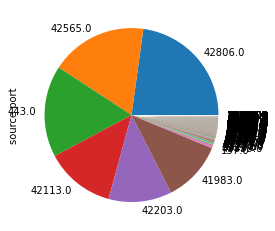

In [38]:
dftemp=dftemp.append(df443,ignore_index = True) # append the dataframes
dftemp['source port'].value_counts().plot(kind='pie') # plot the source port distribution


<AxesSubplot:ylabel='source port'>

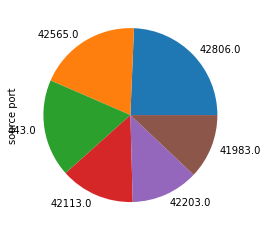

In [41]:

df3=dftemp[dftemp['source port']==443] # create a dataframe with 443 rows
df3=df3.append(dftemp[dftemp['source port']==42806]) # append the dataframes with 42806 rows
df3=df3.append(dftemp[dftemp['source port']==42565]) # append the dataframes with 42565 rows
df3=df3.append(dftemp[dftemp['source port']==42113]) # append the dataframes with 42113 rows
df3=df3.append(dftemp[dftemp['source port']==42203]) # append the dataframes with 42203 rows
df3=df3.append(dftemp[dftemp['source port']==41983]) # append the dataframes with 41983 rows
df=df3.copy() # copy the dataframe into original dataframe
df['source port'].value_counts().plot(kind='pie')


In [42]:
df.to_csv('Data/clean_FB.csv',index=False) # save the dataframe as a csv file to be used later